<a href="https://colab.research.google.com/github/gaiamilenium99/ProyectoSustituto/blob/main/SeoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike Rental

#### Importamos las librerias

In [111]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
from scipy import stats

#### Subimos la base de datos

In [112]:
df_train = pd.read_csv('/content/train.csv',encoding= 'unicode_escape')
df_test = pd.read_csv('/content/test.csv',encoding= 'unicode_escape')

# Eliminamos el valor a hallar
df_test = df_test.drop(columns = ['y'])

In [113]:
df_train.head()

,Date,y,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [114]:
df_test.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/06/2018,12,28.2,34,2.6,1867,10.8,3.26,0.0,0.0,Summer,No Holiday,Yes
1,01/06/2018,13,29.4,33,2.2,1535,11.4,3.30,0.0,0.0,Summer,No Holiday,Yes
2,01/06/2018,14,29.6,31,3.7,1988,10.6,3.25,0.0,0.0,Summer,No Holiday,Yes
3,01/06/2018,15,29.9,36,3.3,1866,13.2,2.94,0.0,0.0,Summer,No Holiday,Yes
4,01/06/2018,16,29.9,34,3.2,1912,12.3,2.46,0.0,0.0,Summer,No Holiday,Yes


#### Observamos los datos

In [115]:
df_train.columns

Index(['Date', 'y', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [116]:
df_train.dtypes

,0
Date,object
y,int64
Hour,int64
Temperature(°C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Dew point temperature(°C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64



### Arreglando la Temperature (°)


In [117]:
df_train = df_train.rename(columns = {df_train.columns[3] : 'Temperature (C)', df_train.columns[7] : 'Dew point temperature (C)'})
df_test = df_test.rename(columns = {df_test.columns[3] : 'Temperature (C)', df_test.columns[7] : 'Dew point temperature (C)'})
#df_train = df_train[df_train['Functioning Day'] != 'No']
#df_train.drop(columns='Functioning Day', inplace=True)
df_train.columns


Index(['Date', 'y', 'Hour', 'Temperature (C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [118]:
df_train.describe()

,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,481.659132,11.483562,5.379954,54.333562,1.896644,1341.856621,-4.011735,0.496338,0.108379,0.122055
std,520.054972,6.922957,9.901552,21.481866,1.113360,643.986512,11.244979,0.816606,0.906182,0.505744
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,139.000000,5.000000,-2.200000,37.000000,1.000000,725.250000,-13.100000,0.000000,0.000000,0.000000
50%,280.000000,11.000000,4.400000,52.000000,1.700000,1536.000000,-3.500000,0.000000,0.000000,0.000000
75%,626.000000,17.000000,13.500000,70.000000,2.600000,1980.000000,4.700000,0.730000,0.000000,0.000000
max,3251.000000,23.000000,29.400000,98.000000,7.400000,2000.000000,22.000000,3.520000,35.000000,5.100000


In [119]:
df_train.isna().sum()

,0
Date,0
y,0
Hour,0
Temperature (C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature (C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


There are no missing values, so..That's a good start

In [120]:
# Seleccionar solo las columnas numéricas
df_train_numeric = df_train.select_dtypes(include=[float, int])

# Calcular la varianza y ordenarla de forma descendente
var_sorted = df_train_numeric.var().sort_values(ascending=False)

# Mostrar el resultado
print(var_sorted)

##df_train.var().sort_values(ascending = False)

Visibility (10m)             414718.627988
y                            270457.174260
Humidity(%)                     461.470579
Dew point temperature (C)       126.449563
Temperature (C)                  98.040740
Hour                             47.927339
Wind speed (m/s)                  1.239571
Rainfall(mm)                      0.821165
Solar Radiation (MJ/m2)           0.666845
Snowfall (cm)                     0.255777
dtype: float64


We should keep an eye for 'Snowfall' and 'Solar Radiation' columns, Cause with a variance this low they might be adding an insignificant amount of information

In [121]:
# we should drop after visualization so this cell should be moved
#df_temp = df_train.drop(columns=["Holiday", "Date", "Rainfall(mm)", "Wind speed (m/s)", Snowfall (cm)"])

In [122]:
def add_working_hour_column(df):
    df["working_hour"] = 0
    df["working_hour"] = ((df["Hour"] >= 5) & (df["Hour"] <= 20)).astype(int)
    return df

In [123]:
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month
df_train['Day'] = pd.DatetimeIndex(df_train['Date']).day
df_train['Weekday'] = pd.DatetimeIndex(df_train['Date']).weekday
df_test['Month'] = pd.DatetimeIndex(df_test['Date']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date']).day
df_test['Weekday'] = pd.DatetimeIndex(df_test['Date']).weekday

In [124]:
#df_train["m_d_h"] = df_train["Month"] * 30 + df_train["Day"] * 24 + df_train["Hour"]
#df_test["m_d_h"] = df_test["Month"] * 30 + df_test["Day"] * 24 + df_test["Hour"]
df_train.head()

,Date,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3


In [125]:
df_train=add_working_hour_column(df_train)
df_test=add_working_hour_column(df_test)

# Some EDA

#### We'll plot the scatter plot for some selected columns

In [50]:
# feature=['y', 'Solar Radiation (MJ/m2)']
# # IQR
# Q1 = np.percentile(df_train[feature], 25,
#                    interpolation = 'midpoint',axis=0)
# print(Q1)
# Q3 = np.percentile(df_train[feature], 75,
#                    interpolation = 'midpoint',axis=0)
# print(Q3)
# IQR = Q3 - Q1

# print("Old Shape: ", df_train.shape)

# # Upper bound
# upper = np.where(df_train[feature] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df_train[feature] <= (Q1-1.5*IQR))

# #Removing the Outliers
# df_train.drop(upper[0], inplace = True, axis=0)
# df_train.drop(lower[0], inplace = True, axis=0)

# print("New Shape: ", df_train.shape)

# **Encoding Categorical Columns**

In [51]:
def get_temp_range(temp_val):
    counter=1
    for i in range(-20,41,10):
        if temp_val <= i :
            return counter
        counter+=1
    return 0

In [52]:
# df_train["temp_range"]=df_train['Temperature (C)'].apply(get_temp_range)
# df_test["temp_range"]=df_test['Temperature (C)'].apply(get_temp_range)
df_train.head()

,Date,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,4,0


In [53]:
def encode_categroical_features(df):
    df["Seasons"] = df["Seasons"].astype("category").cat.codes
    df["Functioning Day"] = df["Functioning Day"].astype("category").cat.codes
    df["Holiday"] = df["Holiday"].astype("category").cat.codes
    return df


In [54]:
def pca_3_components(df, feature1, feature2, feature3,  new_col_name,df_test):
    to_be_transformed = df[[feature1, feature2, feature3]]
    to_be_transformed_test = df_test[[feature1, feature2, feature3]]
    pca = PCA(n_components=1)
    transformed_components = pca.fit_transform(to_be_transformed)
    df[new_col_name] = transformed_components
    df_test[new_col_name]=pca.transform(to_be_transformed_test)
    df.drop(columns=[feature1, feature2, feature3],inplace=True)
    df_test.drop(columns=[feature1, feature2, feature3],inplace=True)
    return df

In [55]:
def filter_functioning_day(df):
    df_columns=df.columns
    for col in df_columns:
        df[col]=df[col]*df['Functioning Day']
    return df

In [56]:
def replace_outlaires(df):
    for feature in df.drop(columns=["Hour", "Month", "Day",'Functioning Day','Seasons']).columns:
        # IQR
        Q1 = np.percentile(df[feature], 25,
                           interpolation = 'midpoint')
        Q3 = np.percentile(df[feature], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        upperL = Q3 + 1.5*IQR
        lowerL = Q1 - 1.5*IQR
        df[feature] = df[feature].map(lambda val: (val if val < upperL else upperL))
        df[feature] = df[feature].map(lambda val: (val if val > lowerL else lowerL))

    print("New Shape: ", df.shape)
    return df

In [57]:
 def pre_processing(df):
    columns_to_drop=['Date', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)']
    df=encode_categroical_features(df)
    df=df.drop(columns=columns_to_drop)
#     _ = pca_3_components(df, "Day", "Month", "m_d_h", "D_M",df_test)
    #df=filter_functioning_day(df)
    return df

# **Now let's see heat map to check for corrolation**

In [58]:
#corr_mat = df_train.corr()
#fig = plt.figure(figsize = (14, 14))
#sns.heatmap(corr_mat, annot= True)
#plt.show()

* We can see strong corrolation between temp and dew point temp, so we can drop dew point
* Snowfall, Rainfall, Holiday and FunctioningDay can be droped

In [59]:
from sklearn.decomposition import PCA
def pca_2_components(df, feature1, feature2,  new_col_name , df_test):
    to_be_transformed = df[[feature1, feature2]]
    to_be_transformed_test = df_test[[feature1, feature2]]
    pca = PCA(n_components=1)
    transformed_components = pca.fit_transform(to_be_transformed)
    df[new_col_name] = transformed_components
    df_test[new_col_name]= pca.transform(to_be_transformed_test)
    df.drop(columns=[feature1,feature2],inplace=True)
    df_test.drop(columns=[feature1,feature2],inplace=True)
    return df

In [60]:
pca_2_components(df_train, 'Dew point temperature (C)', 'Temperature (C)', 'temp_pca',df_test)
#pca_2_components(df_train, 'Solar Radiation (MJ/m2)', 'working_hour', 'solar_work_pca',df_test)
columns_to_drop_aftePCA=['Dew point temperature (C)', 'Temperature (C)']

In [61]:
df_temp =pre_processing(df_train)

In [62]:
df_temp=replace_outlaires(df_temp)

New Shape:  (4380, 13)


<ipython-input-62-19a725adc3d4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df_temp=replace_outlaires(df_temp)


In [63]:
# corr_mat = df_temp.corr()
# fig = plt.figure(figsize = (14, 14))
# sns.heatmap(corr_mat, annot= True)
# plt.show()

# # **Model**

### Functioning Day filteration

In [64]:

df_temp[df_temp['Functioning Day']==0]

,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
3144,0.0,0,82,1041,0.000,0.0,0,0,4,11,2,0,-17.484370
3145,0.0,1,81,886,0.000,0.0,0,0,4,11,2,0,-16.204645
3146,0.0,2,80,885,0.000,0.0,0,0,4,11,2,0,-14.859568
3147,0.0,3,81,687,0.000,0.0,0,0,4,11,2,0,-13.459477
3148,0.0,4,83,554,0.000,0.0,0,0,4,11,2,0,-11.787639
3149,0.0,5,84,447,0.000,0.0,0,0,4,11,2,1,-11.233806
3150,0.0,6,86,442,0.000,0.0,0,0,4,11,2,1,-10.473578
3151,0.0,7,85,438,0.110,0.0,0,0,4,11,2,1,-10.115801
3152,0.0,8,77,519,0.680,0.0,0,0,4,11,2,1,-10.249825
3153,0.0,9,59,975,1.440,0.0,0,0,4,11,2,1,-10.259784


In [65]:
#df_temp['y'] = np.log1p(df_temp['y'])

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df_temp.drop(columns=['y', 'Month', 'Day']), df_temp["y"], test_size=0.005, random_state=42)

In [67]:
df_temp.describe()

,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.0,4380.000000,4380.000000,4380.000000,4380.000000,4380.00000,4380.000000,4380.000000
mean,442.582192,11.483562,54.333562,1341.856621,0.425991,0.0,0.989041,0.989041,4.547945,15.646575,3.00274,0.666438,0.000000
std,411.864288,6.922957,21.481866,643.986512,0.638570,0.0,0.998683,0.104121,3.614848,8.807822,1.99817,0.471539,14.479478
min,0.000000,0.000000,0.000000,27.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,-31.138218
25%,139.000000,5.000000,37.000000,725.250000,0.000000,0.0,0.000000,1.000000,2.000000,8.000000,1.00000,0.000000,-11.781995
50%,280.000000,11.000000,52.000000,1536.000000,0.000000,0.0,0.000000,1.000000,4.000000,16.000000,3.00000,1.000000,-0.132389
75%,626.000000,17.000000,70.000000,1980.000000,0.730000,0.0,2.000000,1.000000,5.000000,23.000000,5.00000,1.000000,11.937121
max,1356.500000,23.000000,98.000000,2000.000000,1.825000,0.0,2.000000,1.000000,12.000000,31.000000,6.00000,1.000000,33.890735


### Apply Feature Scaling

In [68]:

# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)


In [69]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [70]:
#print(pd.DataFrame(X_train).describe())

In [71]:
'''

from sklearn.ensemble import ExtraTreesRegressor

regr = ExtraTreesRegressor(random_state=0)
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)

print(regr.score(X_test, y_test))

y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)
'''

'\n\nfrom sklearn.ensemble import ExtraTreesRegressor\n\nregr = ExtraTreesRegressor(random_state=0)\nregr.fit(X_train, y_train)\n\ny_pred=regr.predict(X_test)\n\nprint(regr.score(X_test, y_test))\n\ny_test, y_pred = np.expm1(y_test), np.expm1(y_pred)\nrmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))\nprint(rmsle)\n'

In [72]:
#len(np.where(y_pred < y_test)[0])

# **XGB**

In [86]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor(objective="reg:tweedie", tweedie_variance_power=1.6, gamma=2, max_depth=6, subsample=.7, reg_alpha=0.15, reg_lambda=1, learning_rate= 0.15)

In [87]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
XGBModel = XGBModel.fit(X_train, y_train, verbose=False)
print(XGBModel.score(X_test, y_test))

0.7702060956433474


In [88]:
y_test

,y
175,387.0
3660,63.0
3331,842.0
2702,758.0
3085,847.0
4230,299.0
151,367.0
2417,1028.0
2714,305.0
1393,103.0


In [89]:
y_pred = XGBModel.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)

0.4879959533285112


In [90]:
len(np.where(y_pred < y_test)[0])

13

In [91]:
print(df_temp[df_temp["y"] < 0])

Empty DataFrame
Columns: [y, Hour, Humidity(%), Visibility (10m), Solar Radiation (MJ/m2), Rainfall(mm), Seasons, Functioning Day, Month, Day, Weekday, working_hour, temp_pca]
Index: []


<Axes: xlabel='y', ylabel='Count'>

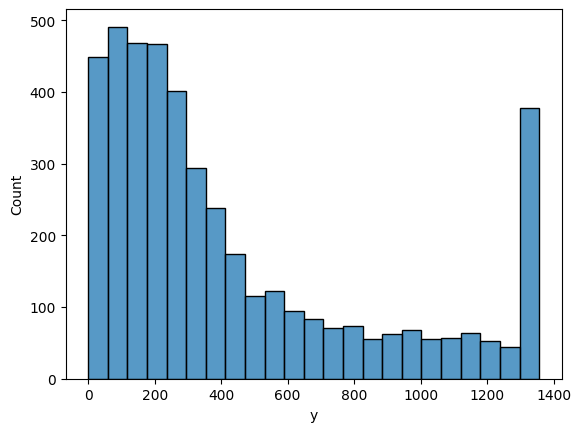

In [92]:
sns.histplot(df_temp["y"])

<Axes: xlabel='y', ylabel='Count'>

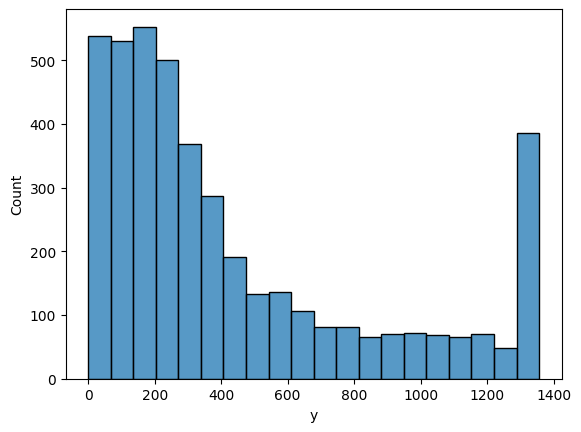

In [93]:
sns.histplot(y_train, bins=20)

<Axes: xlabel='y', ylabel='Count'>

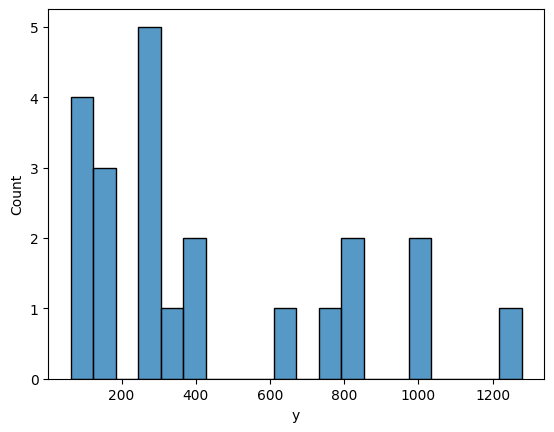

In [94]:
sns.histplot(y_test, bins=20)

<Axes: ylabel='Count'>

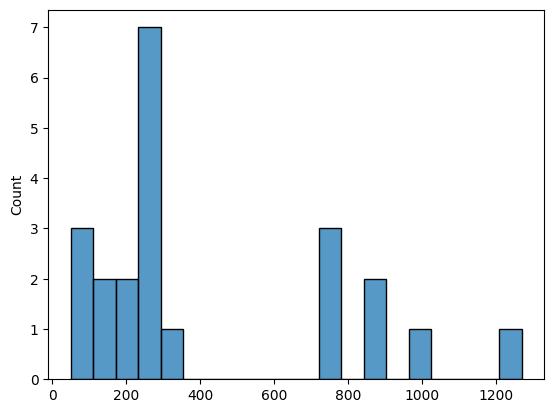

In [95]:
sns.histplot(y_pred, bins=20)

<Axes: ylabel='y'>

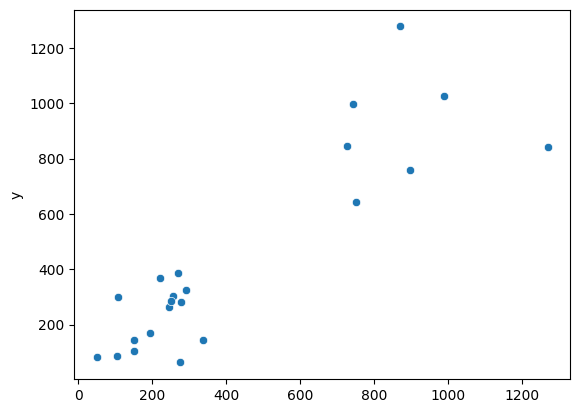

In [96]:
sns.scatterplot(x=y_pred, y=y_test)

<Axes: xlabel='y', ylabel='Count'>

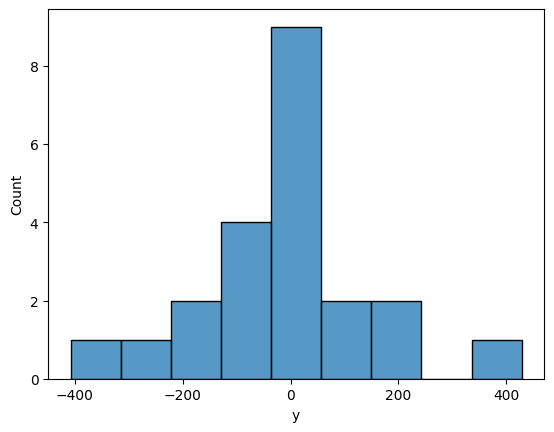

In [97]:
sns.histplot(y_pred-y_test)

In [98]:
print(np.sum(np.abs(y_pred - y_test) > 100))

11


In [99]:
len(y_test)

22

In [100]:
df_test.head()

,Date,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,01/06/2018,12,28.2,2.6,1867,10.8,0.0,0.0,Summer,No Holiday,Yes,1,6,5,1,-24.207838
1,01/06/2018,13,29.4,2.2,1535,11.4,0.0,0.0,Summer,No Holiday,Yes,1,6,5,1,-23.584593
2,01/06/2018,14,29.6,3.7,1988,10.6,0.0,0.0,Summer,No Holiday,Yes,1,6,5,1,-22.239706
3,01/06/2018,15,29.9,3.3,1866,13.2,0.0,0.0,Summer,No Holiday,Yes,1,6,5,1,-25.272669
4,01/06/2018,16,29.9,3.2,1912,12.3,0.0,0.0,Summer,No Holiday,Yes,1,6,5,1,-23.602311


In [101]:

df_test=pre_processing(df_test)

In [102]:
df_test.head()

,Hour,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,12,28.2,1867,10.8,0.0,1,1,1,6,5,1,-24.207838
1,13,29.4,1535,11.4,0.0,1,1,1,6,5,1,-23.584593
2,14,29.6,1988,10.6,0.0,1,1,1,6,5,1,-22.239706
3,15,29.9,1866,13.2,0.0,1,1,1,6,5,1,-25.272669
4,16,29.9,1912,12.3,0.0,1,1,1,6,5,1,-23.602311


In [103]:
df_test[df_test['Functioning Day']==0]

,Hour,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
2604,0,19.5,1916,14.5,0.0,0,0,9,18,1,0,-47.227634
2605,1,19.3,1912,13.9,0.0,0,0,9,18,1,0,-45.920592
2606,2,18.8,1866,14.0,0.0,0,0,9,18,1,0,-47.881155
2607,3,18.7,1916,14.3,0.0,0,0,9,18,1,0,-49.188197
2608,4,18.3,1906,14.3,0.0,0,0,9,18,1,0,-50.495239
...,...,...,...,...,...,...,...,...,...,...,...,...
3871,19,11.9,589,6.7,0.0,0,0,9,11,1,1,-45.920592
3872,20,11.9,526,7.0,0.0,0,0,9,11,1,1,-46.574113
3873,21,11.4,498,6.9,0.0,0,0,9,11,1,0,-47.881155
3874,22,11.2,478,6.9,0.0,0,0,9,11,1,0,-48.534676


In [107]:
X_test = df_test.drop(columns=['Month','Day','y'])
X_test=scaler.transform(X_test)
# You should update/remove the next line once you change the features used for training
y_test_predicted = XGBModel.predict(X_test)
df_test['y'] = y_test_predicted
#df_test['ID']=df_test_ids
df_test.head()
df_test[['y']].to_csv('/content/submission.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [108]:
X_test = df_test.drop(columns=['Month','Day'])
X_test.head()

,Hour,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Seasons,Functioning Day,Weekday,working_hour,temp_pca,y
0,12,28.2,1867,10.8,0.0,1,1,5,1,-24.207838,76.297958
1,13,29.4,1535,11.4,0.0,1,1,5,1,-23.584593,76.297958
2,14,29.6,1988,10.6,0.0,1,1,5,1,-22.239706,76.297958
3,15,29.9,1866,13.2,0.0,1,1,5,1,-25.272669,76.297958
4,16,29.9,1912,12.3,0.0,1,1,5,1,-23.602311,76.297958


In [109]:
df_test.describe()

,Hour,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca,y
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,11.516438,20.385890,1531.794977,12.159361,0.188995,0.501370,0.943607,7.728767,16.569863,3.032877,0.666895,-40.602487,90.948540
std,6.922957,8.644928,554.416910,9.162634,1.312065,0.500055,0.230705,2.698937,7.764424,1.982065,0.471378,11.636004,85.745247
min,0.000000,-3.000000,33.000000,-19.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,-63.611073,0.002843
25%,6.000000,13.900000,1101.750000,5.500000,0.000000,0.000000,1.000000,6.000000,9.000000,1.000000,0.000000,-49.841718,58.927467
50%,12.000000,21.600000,1816.000000,14.000000,0.000000,1.000000,1.000000,8.000000,16.000000,3.000000,1.000000,-40.083028,76.297958
75%,18.000000,26.925000,2000.000000,20.100000,0.000000,1.000000,1.000000,10.000000,23.000000,5.000000,1.000000,-31.901287,104.162209
max,23.000000,39.400000,2000.000000,27.200000,29.500000,1.000000,1.000000,12.000000,31.000000,6.000000,1.000000,-9.424225,1075.777222


In [110]:
df_test[df_test['Functioning Day']==0]

,Hour,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca,y
2604,0,19.5,1916,14.5,0.0,0,0,9,18,1,0,-47.227634,0.020626
2605,1,19.3,1912,13.9,0.0,0,0,9,18,1,0,-45.920592,0.018994
2606,2,18.8,1866,14.0,0.0,0,0,9,18,1,0,-47.881155,0.010962
2607,3,18.7,1916,14.3,0.0,0,0,9,18,1,0,-49.188197,0.010962
2608,4,18.3,1906,14.3,0.0,0,0,9,18,1,0,-50.495239,0.010962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,19,11.9,589,6.7,0.0,0,0,9,11,1,1,-45.920592,0.010815
3872,20,11.9,526,7.0,0.0,0,0,9,11,1,1,-46.574113,0.010815
3873,21,11.4,498,6.9,0.0,0,0,9,11,1,0,-47.881155,0.010962
3874,22,11.2,478,6.9,0.0,0,0,9,11,1,0,-48.534676,0.010962
